In [188]:
import numpy as np
import seaborn as sns

In [189]:
x1 = np.asarray([-2,-3,-1,-1.5,0.5,1,1.5])
x2 = np.asarray([4,3,2.4,2.7,1,1,-0.5])
y = np.asarray([0,0,0,0,1,1,1])
w = np.asarray([-2,1]).reshape(2,1)
b = 0.5

x1,x2,y,w,b

(array([-2. , -3. , -1. , -1.5,  0.5,  1. ,  1.5]),
 array([ 4. ,  3. ,  2.4,  2.7,  1. ,  1. , -0.5]),
 array([0, 0, 0, 0, 1, 1, 1]),
 array([[-2],
        [ 1]]),
 0.5)

In [190]:
X = np.array([-2,-3,-1,-1.5,0.5,1,1.5,4,3,2.4,2.7,1,1,-0.5]).reshape(2,7)
X

array([[-2. , -3. , -1. , -1.5,  0.5,  1. ,  1.5],
       [ 4. ,  3. ,  2.4,  2.7,  1. ,  1. , -0.5]])

In [191]:
Z = np.dot(w.T, X) + b
Z

array([[ 8.5,  9.5,  4.9,  6.2,  0.5, -0.5, -3. ]])

In [192]:
A = 1 /( 1 + np.e**-Z)
A

array([[0.99979657, 0.99992515, 0.99260846, 0.99797468, 0.62245933,
        0.37754067, 0.04742587]])

In [193]:
dZ = A - y
dZ

array([[ 0.99979657,  0.99992515,  0.99260846,  0.99797468, -0.37754067,
        -0.62245933, -0.95257413]])

In [194]:
dw = 1 / len(X) * np.dot(X,dZ.T)
dw

array([[-4.86451497],
       [ 5.77602038]])

___

In [195]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [196]:
X_, y_ = make_blobs(n_samples=100 ,centers = 2, n_features=2, random_state=0)
#(m,2) (m,)
X_.shape, y_.shape
X = X_.T
y = y_.reshape(1,-1)



In [197]:
len(X), len(y)

(2, 1)

In [198]:
X.shape, y.shape

((2, 100), (1, 100))

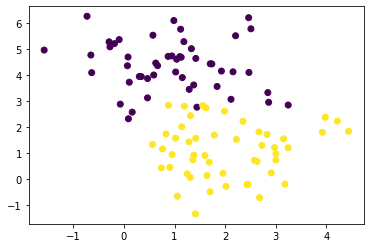

In [199]:
plt.scatter(X[0],X[1], c=y)

In [200]:
b = 0
w = np.array([0,0]).reshape(-1,1)
iterazioni = 1000
lmbd = 0.01
b, w, iterazioni, lmbd

(0,
 array([[0],
        [0]]),
 1000,
 0.01)

In [201]:
costo = []
for i in range(1000):
    Z = np.dot(w.T,X) + b
    A = 1 / (1 + np.e ** -Z)
    dZ = A - y
    dw = 1 / X.shape[1] * np.dot(X, dZ.T)
    db = 1 / X.shape[1] * np.sum(dZ)
    w = w - lmbd*dw
    b = b - lmbd*db
    L = -1 / len(y) * (np.dot(y, np.log(A).T) + np.dot(1- y, np.log(1 - A).T))
    costo.append(L.squeeze())
b,w, costo

(0.6303489379153409,
 array([[ 1.116714  ],
        [-1.01735983]]),
 [array(69.31471806),
  array(68.58824939),
  array(67.89166634),
  array(67.22324307),
  array(66.58134786),
  array(65.96444062),
  array(65.37107),
  array(64.79987015),
  array(64.24955722),
  array(63.71892571),
  array(63.20684466),
  array(62.71225389),
  array(62.23416022),
  array(61.77163371),
  array(61.32380402),
  array(60.88985689),
  array(60.4690307),
  array(60.06061318),
  array(59.66393833),
  array(59.2783834),
  array(58.90336609),
  array(58.53834184),
  array(58.18280139),
  array(57.83626834),
  array(57.49829697),
  array(57.16847012),
  array(56.84639728),
  array(56.53171275),
  array(56.22407393),
  array(55.92315974),
  array(55.62866914),
  array(55.34031974),
  array(55.05784654),
  array(54.78100071),
  array(54.50954851),
  array(54.24327022),
  array(53.98195923),
  array(53.72542108),
  array(53.47347271),
  array(53.22594163),
  array(52.98266524),
  array(52.74349014),
  array(52.5

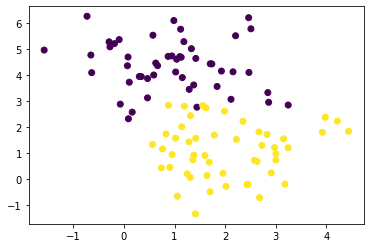

In [202]:
plt.scatter(X[0], X[1], c=y)

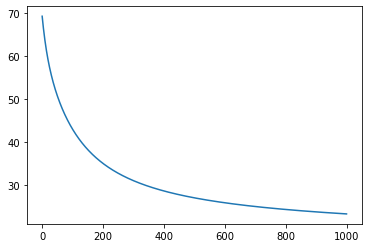

In [203]:
plt.plot(costo)

In [204]:
X_toPredict = np.array([0,5]).T
Z_new = np.dot(w.T, X_toPredict) + b
y_predict = 1/(1+np.e**-Z_new)
y_predict

array([0.01147038])

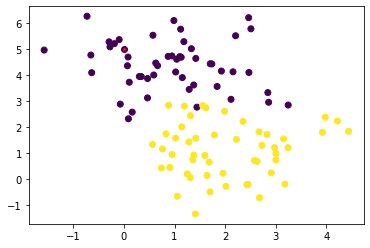

In [205]:

plt.scatter(X[0], X[1], c=y)
plt.scatter(X_toPredict[0], X_toPredict[1], c=y_predict)
plt.scatter(X_toPredict[0], X_toPredict[1], c='r', s=5)


<ipython-input-208-ab010970c21e>:5: UserWarning: No contour levels were found within the data range.
  cs = plt.contour(X_graph, Y_graph, Z_new_a, levels=[0.5], linestyles = 'dashed')


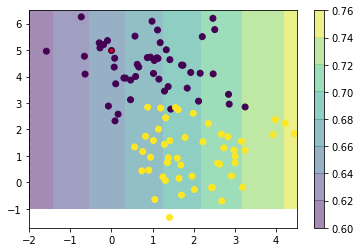

In [208]:
X_graph = np.arange(-2,5,.5)
Y_graph = np.arange(-1,7,.5)
X_graph,Y_graph = np.meshgrid(X_graph,Y_graph)
Z_new_a = 1 / (1+np.exp(-(w[0]*X_graph + w[1]*X_graph + b)))
cs = plt.contour(X_graph, Y_graph, Z_new_a, levels=[0.5], linestyles = 'dashed')
cs = plt.contourf(X_graph, Y_graph, Z_new_a, alpha=.5)
plt.colorbar(cs)
plt.scatter(X[0], X[1], c=y)
plt.scatter(X_toPredict[0], X_toPredict[1], c=y_predict)
plt.scatter(X_toPredict[0], X_toPredict[1], c='r', s=5)

In [207]:
# plt.contourf(X_graph, Y_graph, lst_z, levels=100)